In [1]:
from src.infer_models import infer
from src.preprocess import preprocess
from src.archs_models import *
from src.opts_models import perceptron_kernelizedbatch
import os
import sys
import pathlib
from pathlib import Path

import numpy as np
from numpy.core.shape_base import block
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"]})  # Avant Garde, Helvetica, Computer Modern Sans Serif
# for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"], # Times, Bookman, Pa;atino
# })
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "monospace",
#     "font.monospace": ["Consolas"],
# })

np.set_printoptions(precision=4)
np.set_printoptions(formatter={'float': "{:0.4f}".format})


# Ensure path is referenced to this script's root
# thisdir = os.path.dirname(__file__)
thisdir = Path.cwd()
# os.chdir(thisdir)
os.chdir(sys.path[0])
print(os.getcwd())

figs_dir = os.path.join(thisdir, 'figs/')
if not os.path.isdir(figs_dir):
    os.makedirs(figs_dir)

# os.chdir(r'./ai534ias/ia1/')

# Generate the path to the file relative to your python script:
# script_location = Path(__file__).absolute().parent
# print(script_location)
# file_location = script_location / 'file.yaml'
# file = file_location.open()


/home/somefunagba/ias/ia3


In [2]:
# Data Preprocessing

# do major feature engineering - 0 | 1
doengr = 0
donormalize = 1

# Train
rawdata = 'csvs/IA2-train.csv'
traindata, train_id = preprocess(rawdata, donormalize=donormalize, istrain=1,
                                 traininfo=None, doengr=doengr)

# View final data entering the model.
# print(traindata['X'])

# Dev
rawdata = 'csvs/IA2-dev.csv'
devdata, dev_id = preprocess(rawdata, donormalize=donormalize, istrain=0,
                             traininfo=traindata, doengr=doengr)


data size (rows,columns) (6000, 198)
                    Vehicle_Damage  Previously_Insured  Vehicle_Age_0  \
Vehicle_Damage            1.000000           -0.858465       0.305893   
Previously_Insured       -0.858465            1.000000      -0.313266   
Vehicle_Age_0             0.305893           -0.313266       1.000000   
Vehicle_Age_1            -0.418453            0.418906      -0.855960   
Vehicle_Age_2             0.177294           -0.164105      -0.348569   
Response                  0.598229           -0.583561       0.255089   

                    Vehicle_Age_1  Vehicle_Age_2  Response  
Vehicle_Damage          -0.418453       0.177294  0.598229  
Previously_Insured       0.418906      -0.164105 -0.583561  
Vehicle_Age_0           -0.855960      -0.348569  0.255089  
Vehicle_Age_1            1.000000      -0.186254 -0.341008  
Vehicle_Age_2           -0.186254       1.000000  0.133442  
Response                -0.341008       0.133442  1.000000  
data size (rows,columns)

In [6]:
# DEV: Model Training and Selection

Ns = [10, 30, 50, 100, 300, 500, 1000, 3000, 5000, 6000]

# - max. number of iterations (fixed) - epochs
epochs = 10

# - learning-rate (step-size) selection set
# lrs =  [5e-3, 1e-2, 2e-2, 0.1, 0.5]
# learning rate
# stepsize = 1e-1

# - kernelized perceptron type
wt_types = ['averaged-online', 'online', 'batch']
# - poly degree
p = 1

# - zero weight initialization
#W = np.random.uniform(0, 0.02, (traindata['cols'], 1))
w_alpha = np.zeros(shape=(traindata['rows'], 1))

# Turns out lists and dicts are passed by ref. in python.
# They behave as global variables, modified in function they are passed to.

# list to hold all models
model_sels = []

wt_type = wt_types[2]
# for stepsize in lrs:
traindatar = traindata.copy()

for N in Ns:

    traindatar['X'] = traindata['X'][0:N,:].copy()
    traindatar['Y'] = traindata['Y'][0:N,:].copy()
    w_alpha = np.zeros(shape=(N,1))

    print(f'\nTrain-size:{N}********** {wt_type}: kernelized order {p} - perceptron: ************************')
    print('(start):')
    # print(W.T) # to debug muatbility

    # - modeldict: data structure that holds details of the trained model
    modeldict = {'usekernel': 1, 'alphat': w_alpha.copy(), 'wtype': wt_type, 
                 'p': p, 'Xt': traindatar["X"], 'Yt': traindatar["Y"], 
                 'bndtype': 0,
                 'epochs': epochs, 'stepsize': None,
                 'cols': traindatar['cols'],
                 'normalize': traindatar['scalers'],
                 'mse_train': None, 'mse_dev': None,
                 }

    # - train: iterative line search (full batch)
    %timeit perceptron_kernelizedbatch(modeldict, sgnlinear_kernelized, traindatar, devdata)

    model_sels.append(modeldict)

    print(f"Class Accuracy (Train): {modeldict['facc_train'][-1]:2.4f} | "
          f"(Validation): {modeldict['facc_dev'][-1]:2.4f}")
    # print(W.T)
    print('(end): ----\n')



Train-size:10********** batch: kernelized order 1 - perceptron: ************************
(start):
k:     0, facc(train): 0.0017, facc(dev): 0.4934
k:     0, facc(train): 0.0017, facc(dev): 0.4934
k:     0, facc(train): 0.0017, facc(dev): 0.4934
k:     0, facc(train): 0.0017, facc(dev): 0.4934
k:     0, facc(train): 0.0017, facc(dev): 0.4934
k:     0, facc(train): 0.0017, facc(dev): 0.4934
k:     0, facc(train): 0.0017, facc(dev): 0.4934
k:     0, facc(train): 0.0017, facc(dev): 0.4934
415 ms ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Class Accuracy (Train): 0.0017 | (Validation): 0.4934
(end): ----


Train-size:30********** batch: kernelized order 1 - perceptron: ************************
(start):
k:     0, facc(train): 0.0035, facc(dev): 0.4935
k:     0, facc(train): 0.0045, facc(dev): 0.7432
k:     0, facc(train): 0.0048, facc(dev): 0.7380
k:     0, facc(train): 0.0050, facc(dev): 0.7255
k:     0, facc(train): 0.0050, facc(dev): 0.7255
k:     0, facc(train): 0.0050, 

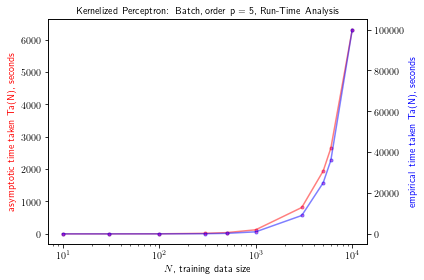

Done.



In [11]:

# Plots
# for mdl in model_sels:
x = np.array([10, 30, 100, 300, 500, 1000, 3000, 5000, 6000, 10000])
c = 0.001
ye = c*np.power(x, 1.7)
ya = c*np.power(x, 2)
fig, ax3 = plt.subplots(figsize=(6, 4), tight_layout=True)
ax3.semilogx(x, ye,
             color='r', marker='.', markerfacecolor='m', alpha=0.5)
ax3.set_ylabel(f'asymptotic time taken Ta(N), seconds', color='r')
ax4 = ax3.twinx()
ax4.semilogx(x, ya,
             color='b', marker='.', markerfacecolor='m', alpha=0.5)
ax4.set_ylabel(f'empirical time taken Ta(N), seconds', color='b')
ax3.set_xlabel(f'$N$, training data size')
ax3.set_title(f"Kernelized Perceptron: Batch, order p = 5, Run-Time Analysis",
              color='k', weight='bold', size=10)
# plt.ion
plt.savefig(
        figs_dir + f"P2bcbatch_kernelperceptron_plt5.pdf", bbox_inches='tight')
plt.show(block=False)
print('Done.\n')